# Can James Bond be black?
## Objective:
Do you think it is acceptable or unacceptable for the character of James Bond to be black?
##### The data set is a response generated data.
### Variable Information:
1. Group: Can James Bond be from this group?
2. Response: Survey answer
3. Remain: People who want to remain in EU
4. Leave: People who want to leave EU

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
bond = pd.read_csv("../input/can-james-bond-be-black/bond.csv")
bond.head()

,Group,Response,Remain,Leave
0,From an ethnic minority,Acceptable,73,47
1,From an ethnic minority,Unacceptable,17,41
2,From an ethnic minority,Don't know,10,12
3,Female,Acceptable,46,26
4,Female,Unacceptable,42,65


In [3]:
df=pd.DataFrame(bond)
df.shape

(12, 4)

In [4]:
print('Column Names: ',df.columns)
print('Shape', df.shape)

Column Names:  Index(['Group', 'Response', 'Remain', 'Leave'], dtype='object')
Shape (12, 4)


In [5]:
df.isnull().sum()

Group       0
Response    0
Remain      0
Leave       0
dtype: int64

In [6]:
print(df["Group"].value_counts())
print()
print(df["Response"].value_counts())
print()
print(df["Remain"].value_counts())
print()
print(df["Leave"].value_counts())

Female                          3
From an ethnic minority         3
Gay                             3
Of a non-British nationality    3
Name: Group, dtype: int64

Acceptable      4
Unacceptable    4
Don't know      4
Name: Response, dtype: int64

10    2
42    1
46    1
61    1
12    1
11    1
73    1
43    1
47    1
28    1
17    1
Name: Remain, dtype: int64

11    2
47    1
12    1
52    1
26    1
41    1
25    1
36    1
9     1
65    1
64    1
Name: Leave, dtype: int64


In [7]:
df.drop(['Remain','Leave'], axis=1, inplace=True)

In [8]:
print(df.shape)
df.head(12)

(12, 2)


,Group,Response
0,From an ethnic minority,Acceptable
1,From an ethnic minority,Unacceptable
2,From an ethnic minority,Don't know
3,Female,Acceptable
4,Female,Unacceptable
5,Female,Don't know
6,Gay,Acceptable
7,Gay,Unacceptable
8,Gay,Don't know
9,Of a non-British nationality,Acceptable


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
Group       12 non-null object
Response    12 non-null object
dtypes: object(2)
memory usage: 320.0+ bytes


In [10]:
df.describe()

,Group,Response
count,12,12
unique,4,3
top,Female,Acceptable
freq,3,4


In [11]:
colname =[]
for j in df.columns[:]:
    if df[j].dtype == 'object':
        colname.append(j)

colname

['Group', 'Response']

In [12]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for j in colname:
    df[j] = le.fit_transform(df[j].astype(str))

In [13]:
df.head(12)

,Group,Response
0,1,0
1,1,2
2,1,1
3,0,0
4,0,2
5,0,1
6,2,0
7,2,2
8,2,1
9,3,0


### Data info and interpretation after Label Encoding
##### Group: [0-Females ; 1-From an enthnic minority ; 2-Gay ; 3-Of a non-Britrish Nationality]
##### Response: [0-Acceptable ; 1-Don't Know ; 2-Unacceptable]

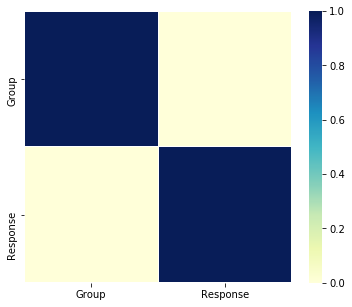

In [14]:
corrmat = df.corr()

f, ax = plt.subplots(figsize =(6, 5)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

This shows that the data is correlated to each other

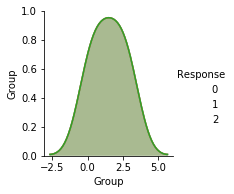

In [15]:
sns.pairplot(df, hue='Response')

This shows that the distribution of data is normal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4fd8988d0>,
      dtype=object)

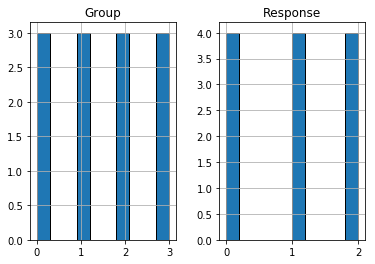

In [16]:
df.hist(edgecolor='black')

This shows the distribution of data